In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from src.utils import load_2d_data, compare_flow_models_2d
from src.loss import FlowLoss, OneFlowLoss
from src.model import FlowModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training options

In [2]:
n_epochs = 2000
l_rate = 1e-3

hidden_dim = 16 # in each coupling layer
n_layers = 4 # in each coupling layer
n_couplings = 4

input_dim = 2

batch_size = 1000
n = batch_size
p = 0.05

det_type = 'const'

def train(model, model_loss, model_optimizer):
    train_size = X.shape[0]

    for i in tqdm(range(n_epochs)):
        model.train()
        perm = np.random.permutation(train_size)
        X_train = X[perm,:]
        
        for j in np.arange(0, train_size, batch_size):
            x_batch = X_train[j:(j+batch_size),:]
            
            z, logdetJ = model.flow(x_batch)
            loss = model_loss(z, logdetJ)

            model_optimizer.zero_grad()
            loss.backward()
            model_optimizer.step()

# Experiments

## Donut

### Create dataset

In [3]:
X = torch.from_numpy(load_2d_data("Donut", train=True)).double().to(device)
X_test = torch.from_numpy(load_2d_data("Donut", train=False)).double().to(device)
X.shape, X_test.shape

(torch.Size([10000, 2]), torch.Size([1000, 2]))

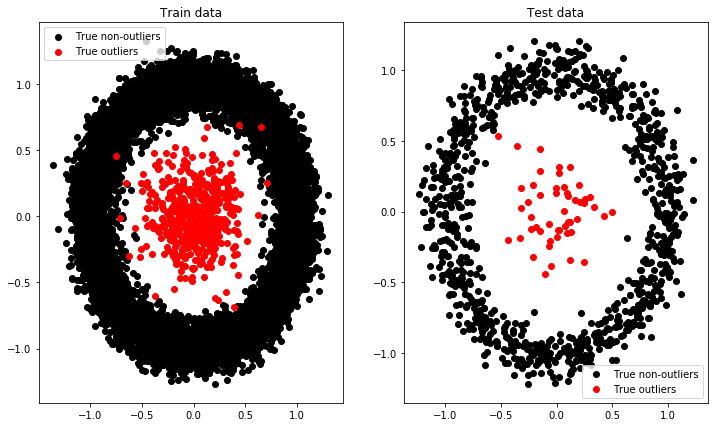

In [4]:
plt.figure(figsize=(12,7))

plt.subplot(1, 2, 1)
plt.scatter(X.cpu().numpy()[:9500,0], X.cpu().numpy()[:9500,1], c='black', label="True non-outliers")
plt.scatter(X.cpu().numpy()[9500:,0], X.cpu().numpy()[9500:,1], c='red', label="True outliers")
plt.axis('on')
plt.title('Train data')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(X_test.cpu().numpy()[:950,0], X_test.cpu().numpy()[:950,1], c='black', label="True non-outliers")
plt.scatter(X_test.cpu().numpy()[950:,0], X_test.cpu().numpy()[950:,1], c='red', label="True outliers")
plt.axis('on')
plt.title('Test data')
plt.legend()

plt.show()

### Define models

In [5]:
one_flow = FlowModel(det_type, input_dim, n_layers, n_couplings, hidden_dim).to(device)
one_flow_optimizer = torch.optim.Adam(one_flow.parameters(), lr=l_rate)
one_flow_loss = OneFlowLoss(p, one_flow)

In [6]:
ll_flow = FlowModel(det_type, input_dim, n_layers, n_couplings, hidden_dim).to(device)
ll_flow_optimizer = torch.optim.Adam(ll_flow.parameters(), lr=l_rate)
prior_z = torch.distributions.MultivariateNormal(torch.zeros(ll_flow.input_dim), torch.eye(ll_flow.input_dim))
ll_flow_loss = FlowLoss(prior_z)

### Train models

In [7]:
train(one_flow, one_flow_loss, one_flow_optimizer)

100%|██████████| 2000/2000 [05:54<00:00,  7.35it/s]


In [8]:
train(ll_flow, ll_flow_loss, ll_flow_optimizer)

100%|██████████| 2000/2000 [05:51<00:00,  6.43it/s]


### Compare OneFlow and LL-Flow

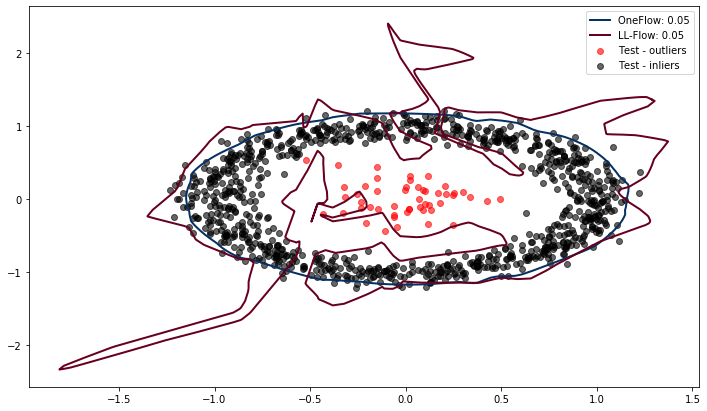

In [9]:
import itertools
compare_flow_models_2d(one_flow, ll_flow, X_test)

## Diverse Blobs

### Create dataset

In [10]:
X = torch.from_numpy(load_2d_data("Diverse Blobs", train=True)).double().to(device)
X_test = torch.from_numpy(load_2d_data("Diverse Blobs", train=False)).double().to(device)
X.shape, X_test.shape

(torch.Size([10000, 2]), torch.Size([1000, 2]))

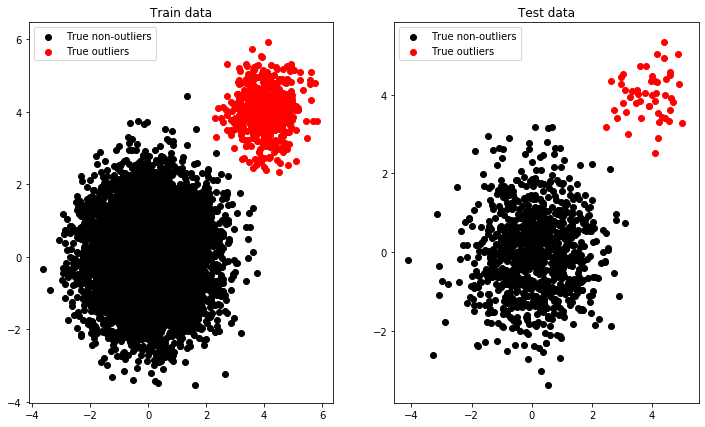

In [11]:
plt.figure(figsize=(12,7))

plt.subplot(1, 2, 1)
plt.scatter(X.cpu().numpy()[:9500,0], X.cpu().numpy()[:9500,1], c='black', label="True non-outliers")
plt.scatter(X.cpu().numpy()[9500:,0], X.cpu().numpy()[9500:,1], c='red', label="True outliers")
plt.axis('on')
plt.title('Train data')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(X_test.cpu().numpy()[:950,0], X_test.cpu().numpy()[:950,1], c='black', label="True non-outliers")
plt.scatter(X_test.cpu().numpy()[950:,0], X_test.cpu().numpy()[950:,1], c='red', label="True outliers")
plt.axis('on')
plt.title('Test data')
plt.legend()

plt.show()

### Define models

In [12]:
one_flow = FlowModel(det_type, input_dim, n_layers, n_couplings, hidden_dim).to(device)
one_flow_optimizer = torch.optim.Adam(one_flow.parameters(), lr=l_rate)
one_flow_loss = OneFlowLoss(p, one_flow)

In [13]:
ll_flow = FlowModel(det_type, input_dim, n_layers, n_couplings, hidden_dim).to(device)
ll_flow_optimizer = torch.optim.Adam(ll_flow.parameters(), lr=l_rate)
prior_z = torch.distributions.MultivariateNormal(torch.zeros(ll_flow.input_dim), torch.eye(ll_flow.input_dim))
ll_flow_loss = FlowLoss(prior_z)

### Train models

In [14]:
train(one_flow, one_flow_loss, one_flow_optimizer)

100%|██████████| 2000/2000 [05:46<00:00,  4.77it/s]


In [15]:
train(ll_flow, ll_flow_loss, ll_flow_optimizer)

100%|██████████| 2000/2000 [06:08<00:00,  6.00it/s]


### Compare OneFlow and LL-Flow

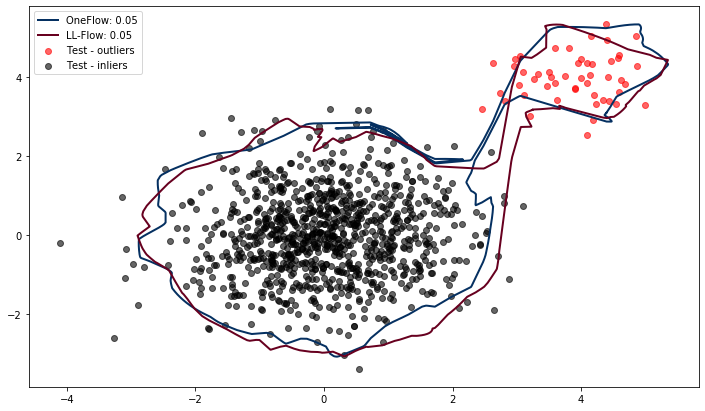

In [16]:
compare_flow_models_2d(one_flow, ll_flow, X_test)

## Moons

### Create dataset

In [17]:
X = torch.from_numpy(load_2d_data("Moons", train=True)).double().to(device)
X_test = torch.from_numpy(load_2d_data("Moons", train=False)).double().to(device)
X.shape, X_test.shape

(torch.Size([10000, 2]), torch.Size([1000, 2]))

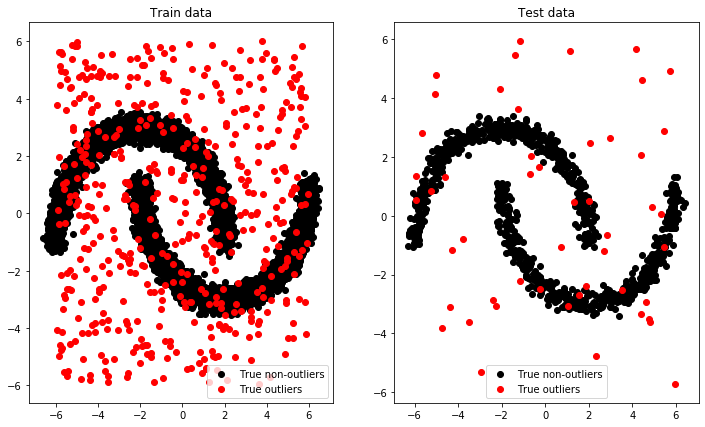

In [18]:
plt.figure(figsize=(12,7))

plt.subplot(1, 2, 1)
plt.scatter(X.cpu().numpy()[:9500,0], X.cpu().numpy()[:9500,1], c='black', label="True non-outliers")
plt.scatter(X.cpu().numpy()[9500:,0], X.cpu().numpy()[9500:,1], c='red', label="True outliers")
plt.axis('on')
plt.title('Train data')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(X_test.cpu().numpy()[:950,0], X_test.cpu().numpy()[:950,1], c='black', label="True non-outliers")
plt.scatter(X_test.cpu().numpy()[950:,0], X_test.cpu().numpy()[950:,1], c='red', label="True outliers")
plt.axis('on')
plt.title('Test data')
plt.legend()

plt.show()

### Define models

In [19]:
one_flow = FlowModel(det_type, input_dim, n_layers, n_couplings, hidden_dim).to(device)
one_flow_optimizer = torch.optim.Adam(one_flow.parameters(), lr=l_rate)
one_flow_loss = OneFlowLoss(p, one_flow)

In [20]:
ll_flow = FlowModel(det_type, input_dim, n_layers, n_couplings, hidden_dim).to(device)
ll_flow_optimizer = torch.optim.Adam(ll_flow.parameters(), lr=l_rate)
prior_z = torch.distributions.MultivariateNormal(torch.zeros(ll_flow.input_dim), torch.eye(ll_flow.input_dim))
ll_flow_loss = FlowLoss(prior_z)

### Train models

In [21]:
train(one_flow, one_flow_loss, one_flow_optimizer)

100%|██████████| 2000/2000 [05:53<00:00,  5.91it/s]


In [22]:
train(ll_flow, ll_flow_loss, ll_flow_optimizer)

100%|██████████| 2000/2000 [06:06<00:00,  4.85it/s]


### Compare OneFlow and LL-Flow

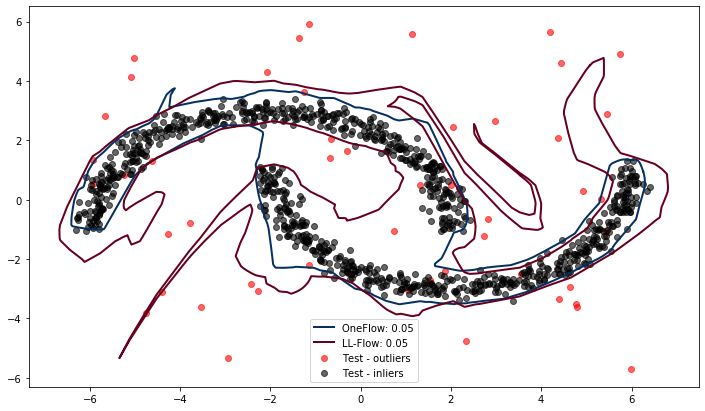

In [23]:
compare_flow_models_2d(one_flow, ll_flow, X_test)

## Two Blobs

### Create dataset

In [24]:
X = torch.from_numpy(load_2d_data("Two Blobs", train=True)).double().to(device)
X_test = torch.from_numpy(load_2d_data("Two Blobs", train=False)).double().to(device)
X.shape, X_test.shape

(torch.Size([10000, 2]), torch.Size([1000, 2]))

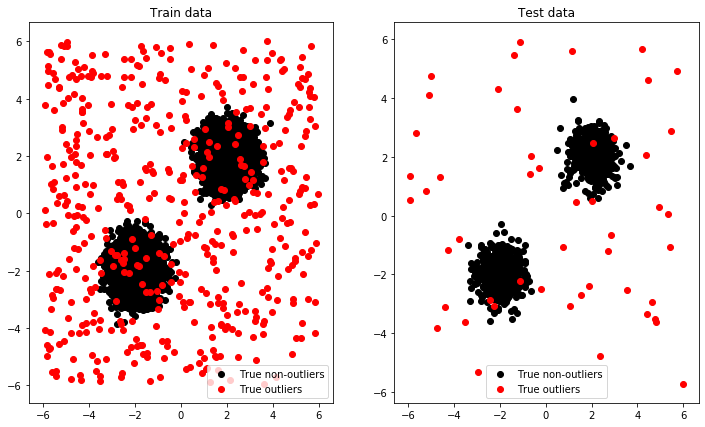

In [25]:
plt.figure(figsize=(12,7))

plt.subplot(1, 2, 1)
plt.scatter(X.cpu().numpy()[:9500,0], X.cpu().numpy()[:9500,1], c='black', label="True non-outliers")
plt.scatter(X.cpu().numpy()[9500:,0], X.cpu().numpy()[9500:,1], c='red', label="True outliers")
plt.axis('on')
plt.title('Train data')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(X_test.cpu().numpy()[:950,0], X_test.cpu().numpy()[:950,1], c='black', label="True non-outliers")
plt.scatter(X_test.cpu().numpy()[950:,0], X_test.cpu().numpy()[950:,1], c='red', label="True outliers")
plt.axis('on')
plt.title('Test data')
plt.legend()

plt.show()

### Define models

In [26]:
one_flow = FlowModel(det_type, input_dim, n_layers, n_couplings, hidden_dim).to(device)
one_flow_optimizer = torch.optim.Adam(one_flow.parameters(), lr=l_rate)
one_flow_loss = OneFlowLoss(p, one_flow)

In [27]:
ll_flow = FlowModel(det_type, input_dim, n_layers, n_couplings, hidden_dim).to(device)
ll_flow_optimizer = torch.optim.Adam(ll_flow.parameters(), lr=l_rate)
prior_z = torch.distributions.MultivariateNormal(torch.zeros(ll_flow.input_dim), torch.eye(ll_flow.input_dim))
ll_flow_loss = FlowLoss(prior_z)

### Train models

In [28]:
train(one_flow, one_flow_loss, one_flow_optimizer)

100%|██████████| 2000/2000 [05:49<00:00,  7.23it/s]


In [29]:
train(ll_flow, ll_flow_loss, ll_flow_optimizer)

100%|██████████| 2000/2000 [05:52<00:00,  6.17it/s]


### Compare OneFlow and LL-Flow

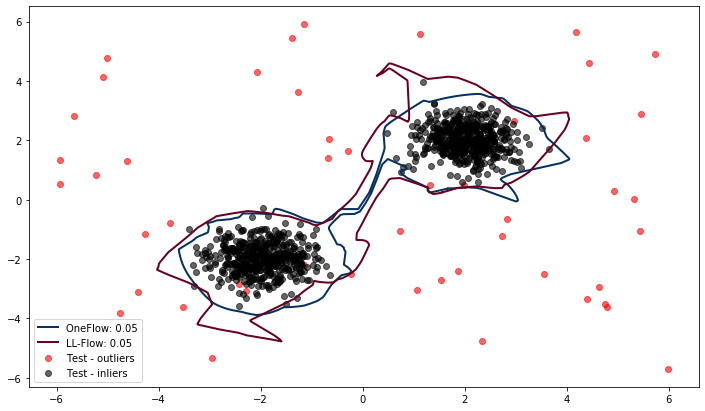

In [30]:
compare_flow_models_2d(one_flow, ll_flow, X_test)

## Big Uniform

### Create dataset

In [31]:
X = torch.from_numpy(load_2d_data("Big Uniform", train=True)).double().to(device)
X_test = torch.from_numpy(load_2d_data("Big Uniform", train=False)).double().to(device)
X.shape, X_test.shape

(torch.Size([10000, 2]), torch.Size([1000, 2]))

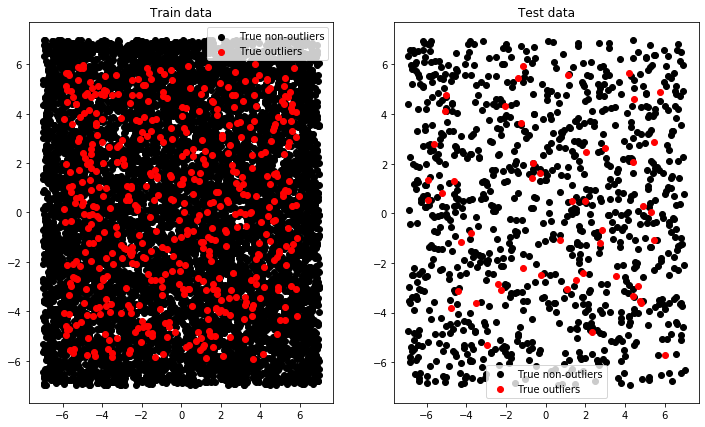

In [32]:
plt.figure(figsize=(12,7))

plt.subplot(1, 2, 1)
plt.scatter(X.cpu().numpy()[:9500,0], X.cpu().numpy()[:9500,1], c='black', label="True non-outliers")
plt.scatter(X.cpu().numpy()[9500:,0], X.cpu().numpy()[9500:,1], c='red', label="True outliers")
plt.axis('on')
plt.title('Train data')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(X_test.cpu().numpy()[:950,0], X_test.cpu().numpy()[:950,1], c='black', label="True non-outliers")
plt.scatter(X_test.cpu().numpy()[950:,0], X_test.cpu().numpy()[950:,1], c='red', label="True outliers")
plt.axis('on')
plt.title('Test data')
plt.legend()

plt.show()

### Define models

In [33]:
one_flow = FlowModel(det_type, input_dim, n_layers, n_couplings, hidden_dim).to(device)
one_flow_optimizer = torch.optim.Adam(one_flow.parameters(), lr=l_rate)
one_flow_loss = OneFlowLoss(p, one_flow)

In [34]:
ll_flow = FlowModel(det_type, input_dim, n_layers, n_couplings, hidden_dim).to(device)
ll_flow_optimizer = torch.optim.Adam(ll_flow.parameters(), lr=l_rate)
prior_z = torch.distributions.MultivariateNormal(torch.zeros(ll_flow.input_dim), torch.eye(ll_flow.input_dim))
ll_flow_loss = FlowLoss(prior_z)

### Train models

In [35]:
train(one_flow, one_flow_loss, one_flow_optimizer)

100%|██████████| 2000/2000 [05:36<00:00,  6.87it/s]


In [36]:
train(ll_flow, ll_flow_loss, ll_flow_optimizer)

100%|██████████| 2000/2000 [05:53<00:00,  5.81it/s]


### Compare OneFlow and LL-Flow

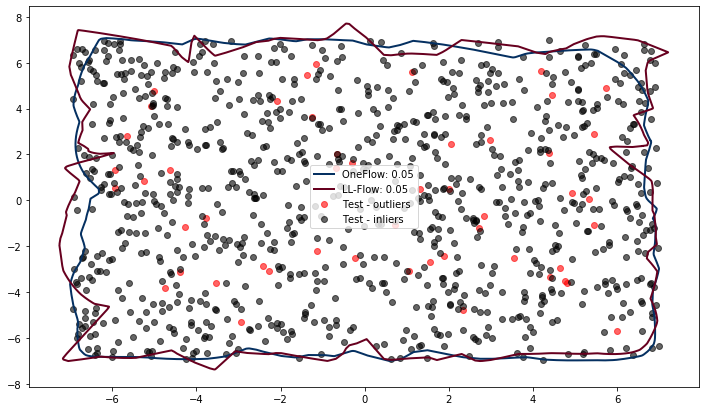

In [37]:
compare_flow_models_2d(one_flow, ll_flow, X_test)